<a href="https://colab.research.google.com/github/Anushareddy1203/final-code/blob/main/Finalcode13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
import pandas as pd
import signal
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
base_path = '/content/drive/MyDrive/weatherdata'
daily_path = os.path.join(base_path, 'daily/daily')
daily_files = [os.path.join(daily_path, f) for f in os.listdir(daily_path) if f.endswith('.txt') and f != 'README.txt']
print("Daily files:", daily_files)

Daily files: ['/content/drive/MyDrive/weatherdata/daily/daily/210824.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210819.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210826.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210901.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210830.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210903.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210829.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210904.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210831.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210905.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210828.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210902.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210906.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210911.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210908.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210912.txt', '/content/

In [4]:
class TimeoutException(Exception):
    pass
def timeout_handler(signum, frame):
    raise TimeoutException
signal.signal(signal.SIGALRM, timeout_handler)

<Handlers.SIG_DFL: 0>

In [4]:
def daily_reader(daily_files):
  daily_dfs = []
  daily_errors = []
  for i, file in enumerate(daily_files):
    try:
        signal.alarm(60)
        df_date = pd.read_csv(file, delim_whitespace=True, encoding='ISO-8859-1')
        date = list(df_date.columns)[0]
        if file.startswith('/content/drive/MyDrive/weatherdata/daily/daily/2'):
          req_columns = ['Time','Wind Dir','Wind Spd','Wind Gust','Hum In','Humidity','Temp In','Temp','Raw Barom','UV','Solar','Dew Point','DailyRain','RainRate']
          df = pd.read_csv(file, delim_whitespace=True, encoding='ISO-8859-1', header= 1)
          c = (df.columns)[:14]
          c = list(c)
        else:
          req_columns = ['Time','Wind Dir','Wind Spd','Hum In','Humidity','Temp In','Temp','Raw Barom','Temp Ch 1','Hum Ch 1','Temp Ch 2','Hum Ch 2','UV','Solar','Dew Point','RainRate']
          df = pd.read_csv(file, delim_whitespace=True, encoding='ISO-8859-1', header= 1)
          c = (df.columns)[:16]
          c = list(c)
        di = {}
        for i,c1 in enumerate(req_columns):
          di[c[i]] = c1
        df_f = df[c]
        df_f = pd.DataFrame(df_f)
        df_f.rename(columns=di, inplace=True)
        main_col = ['Time','Wind Dir','Wind Spd','Hum In','Humidity','Temp In','Temp','Raw Barom','UV','Solar','Dew Point','RainRate']
        df_f = df_f[main_col]
        df_f = df_f.drop(index=0)
        df_f['Date'] = pd.to_datetime(date + ' ' + df_f['Time'], format='%d/%m/%y %H:%M')
        daily_dfs.append(df_f)
    except TimeoutException:
        print(f"Timeout reading {file}")
        print(i)
        daily_errors.append(file)
    except Exception as e:
        print(f"Error reading {file}: {e}")
        daily_errors.extend(file)
    finally:
        signal.alarm(0)
  if daily_dfs:
    daily_data = pd.concat(daily_dfs, ignore_index=True)
  else:
    daily_data = pd.DataFrame()
  return daily_data, daily_errors

In [6]:
error_files = []
daily_df = pd.DataFrame()
num_parts = 11
part_size = len(daily_files) // num_parts
remainder = len(daily_files) % num_parts
start = 0
for i in range(num_parts):
  end = start + part_size + (1 if i < remainder else 0)
  df, err = daily_reader(daily_files[start:end])
  error_files.extend(err)
  start = end
  daily_df = pd.concat([daily_df, df], axis=0)

Timeout reading /content/drive/MyDrive/weatherdata/daily/daily/211011.txt
45
Error reading /content/drive/MyDrive/weatherdata/daily/daily/120825.txt: No columns to parse from file
Error reading /content/drive/MyDrive/weatherdata/daily/daily/121220.txt: Error tokenizing data. C error: Expected 30 fields in line 689, saw 31



In [7]:
daily_df.to_csv('/content/drive/MyDrive/weatherdata/daily_data.csv')

In [25]:
daily_df = pd.read_csv('/content/drive/MyDrive/weatherdata/daily_data.csv')

In [26]:
daily_df.head()

,Unnamed: 0,Time,Wind Dir,Wind Spd,Hum In,Humidity,Temp In,Temp,Raw Barom,UV,Solar,Dew Point,RainRate,Date
0,0,0:00,314.0,3.2,50.0,94.0,19.3,11.3,1023.1,0.0,0.0,10.3,0.0,2021-08-24 00:00:00
1,1,0:01,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:01:00
2,2,0:02,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:02:00
3,3,0:03,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:03:00
4,4,0:04,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:04:00


In [7]:
daily_df.drop(columns=['Unnamed: 0'], inplace=True)


In [8]:
daily_df.head()

,Time,Wind Dir,Wind Spd,Hum In,Humidity,Temp In,Temp,Raw Barom,UV,Solar,Dew Point,RainRate,Date
0,0:00,314.0,3.2,50.0,94.0,19.3,11.3,1023.1,0.0,0.0,10.3,0.0,2021-08-24 00:00:00
1,0:01,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:01:00
2,0:02,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:02:00
3,0:03,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:03:00
4,0:04,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:04:00


In [29]:
daily_df['Date']= pd.to_datetime(daily_df['Date'])

In [30]:
daily_df['Day']= daily_df['Date'].dt.date
daily_df['month']= daily_df['Date'].dt.month
daily_df['year']= daily_df['Date'].dt.year

In [11]:
daily_df.head()

,Time,Wind Dir,Wind Spd,Hum In,Humidity,Temp In,Temp,Raw Barom,UV,Solar,Dew Point,RainRate,Date,Day,month,year
0,0:00,314.0,3.2,50.0,94.0,19.3,11.3,1023.1,0.0,0.0,10.3,0.0,2021-08-24 00:00:00,2021-08-24,8,2021
1,0:01,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:01:00,2021-08-24,8,2021
2,0:02,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:02:00,2021-08-24,8,2021
3,0:03,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:03:00,2021-08-24,8,2021
4,0:04,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:04:00,2021-08-24,8,2021


Exploratory Data Analysis EDA

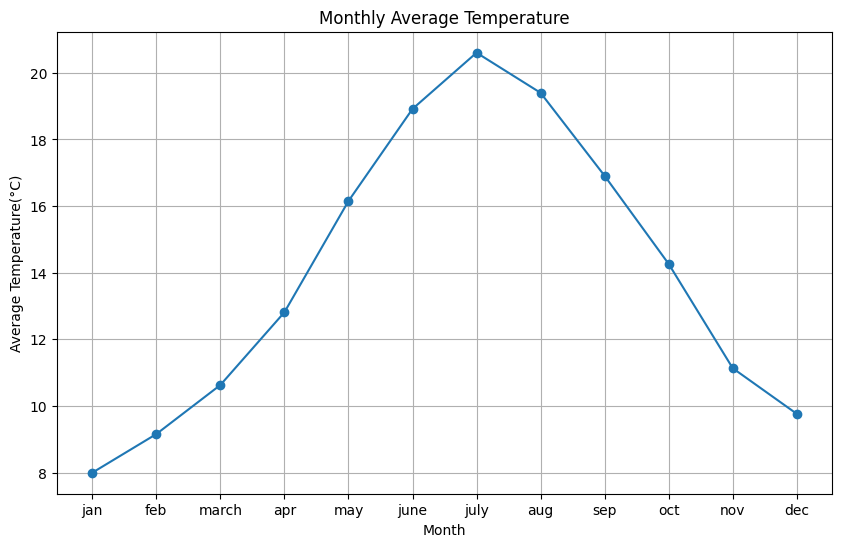

In [12]:
monthly_temp= daily_df.groupby('month')['Temp'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_temp.index, monthly_temp.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Temperature(°C)')
plt.xticks(range(1,13),['jan','feb','march','apr','may','june','july','aug','sep','oct','nov','dec'])
plt.title('Monthly Average Temperature')
plt.grid(True)
plt.show()


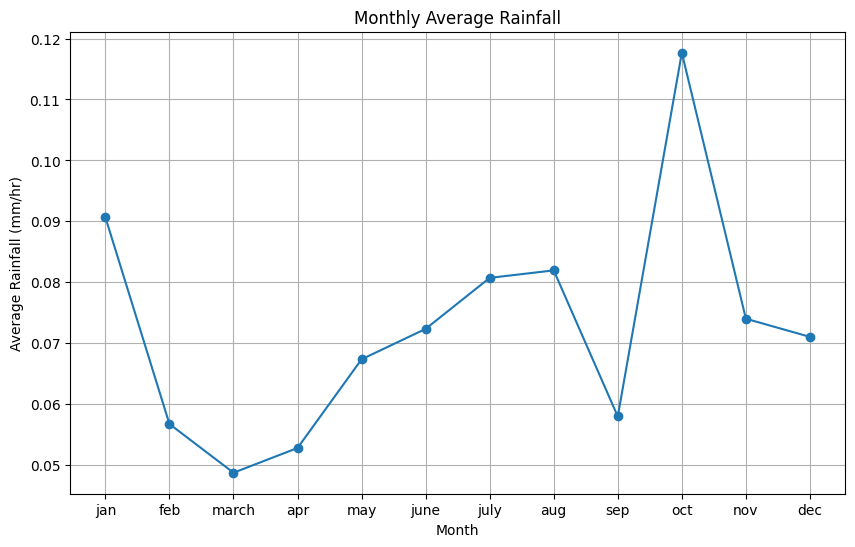

In [13]:
monthly_rainfall = daily_df.groupby('month')['RainRate'].mean()
plt.figure(figsize=(10, 6))
plt.plot(monthly_rainfall.index, monthly_rainfall.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm/hr)')
plt.xticks(range(1,13),['jan','feb','march','apr','may','june','july','aug','sep','oct','nov','dec'])
plt.title('Monthly Average Rainfall')
plt.grid(True)
plt.show()

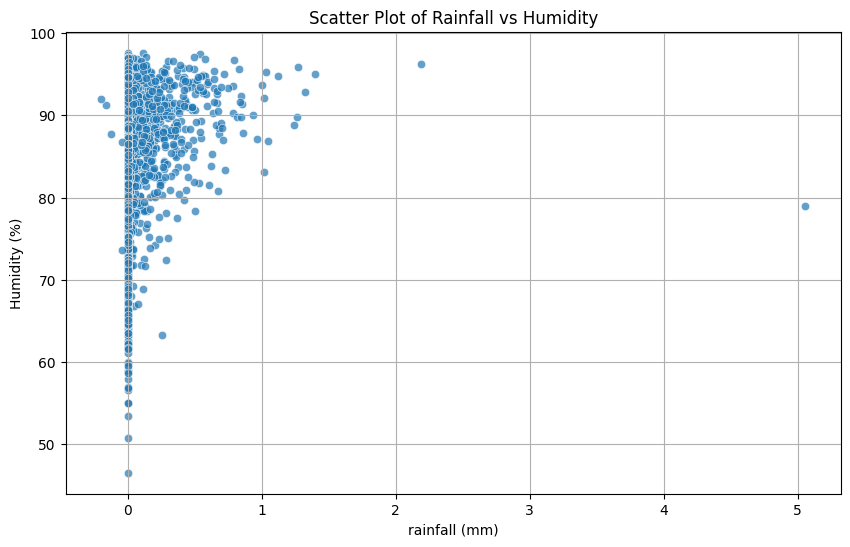

In [45]:
rainfall = daily_df.groupby('Day')['RainRate'].mean()
humidity = daily_df.groupby('Day')['Humidity'].mean()
plt.figure(figsize=(10, 6))
plt.scatter(rainfall, humidity, alpha=0.7, edgecolors='w', linewidth=0.5)
plt.title('Scatter Plot of Rainfall vs Humidity')
plt.xlabel('rainfall (mm)')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

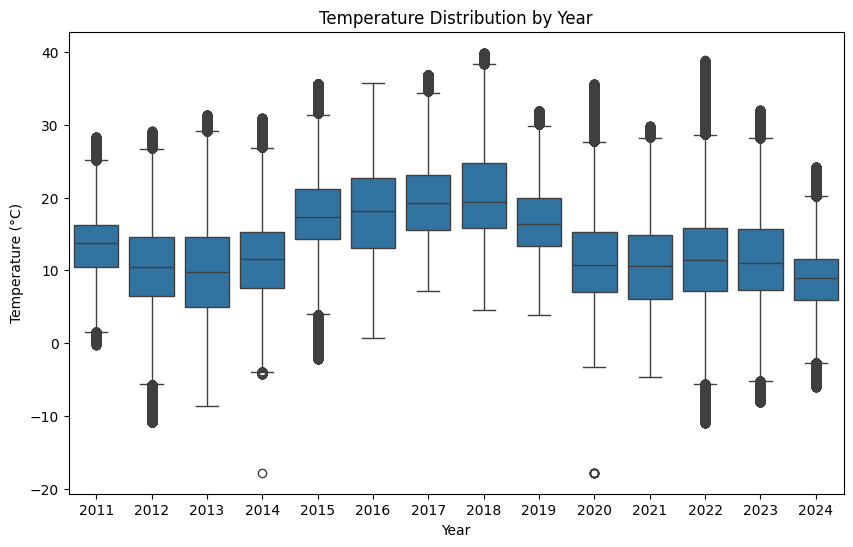

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='Temp', data=daily_df)
plt.title('Temperature Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.show()


In [40]:
daily_df.head()

,Unnamed: 0,Time,Wind Dir,Wind Spd,Hum In,Humidity,Temp In,Temp,Raw Barom,UV,Solar,Dew Point,RainRate,Date,Day,month,year
0,0,0:00,314.0,3.2,50.0,94.0,19.3,11.3,1023.1,0.0,0.0,10.3,0.0,2021-08-24 00:00:00,2021-08-24,8,2021
1,1,0:01,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:01:00,2021-08-24,8,2021
2,2,0:02,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:02:00,2021-08-24,8,2021
3,3,0:03,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:03:00,2021-08-24,8,2021
4,4,0:04,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:04:00,2021-08-24,8,2021


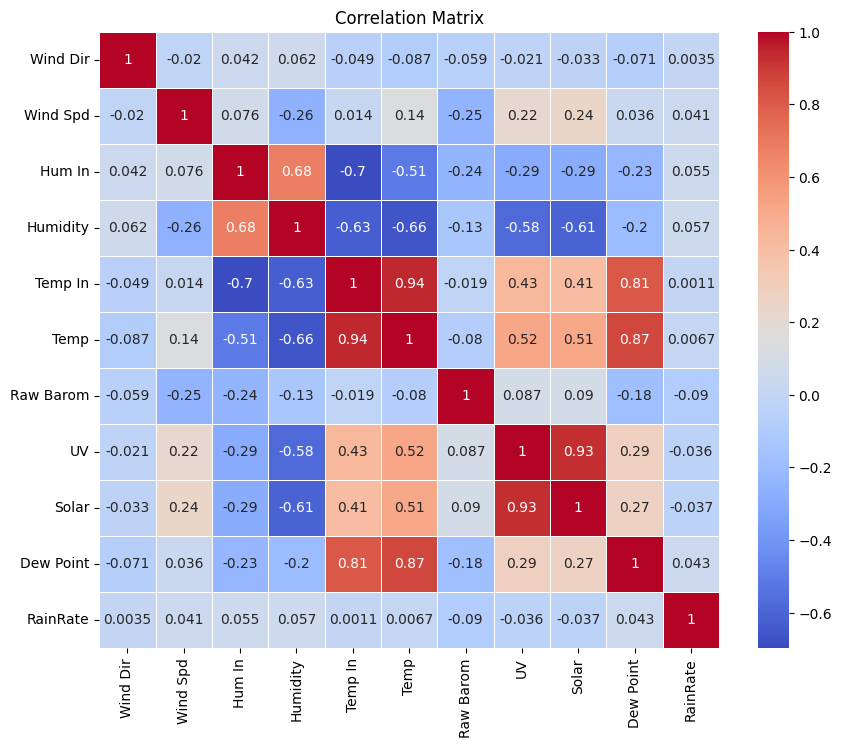

In [43]:
year = 2022
daily_df_2022 = daily_df[daily_df['year'] == year].copy()
daily_df_2022.drop(columns=['year','Date','Day','month','Time','Unnamed: 0'], inplace=True)
#correlation_matrix = daily_df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(daily_df_2022.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [41]:
daily_df_2022.drop(columns=['Unnamed: 0'], inplace=True)

In [32]:
daily_df_2022.head()

,Unnamed: 0,Time,Wind Dir,Wind Spd,Hum In,Humidity,Temp In,Temp,Raw Barom,UV,Solar,Dew Point,RainRate
184320,184320,0:00,251.0,8.0,53.0,92.0,14.1,5.6,1002.8,0.0,0.0,4.4,0.0
184321,184321,0:01,238.0,4.8,52.0,92.0,14.1,5.6,1002.8,0.0,0.0,4.4,0.0
184322,184322,0:02,218.0,6.4,52.0,92.0,14.1,5.6,1002.7,0.0,0.0,4.4,0.0
184323,184323,0:03,251.0,1.6,52.0,92.0,14.1,5.6,1002.7,0.0,0.0,4.4,0.0
184324,184324,0:04,249.0,11.3,52.0,92.0,14.1,5.6,1002.8,0.0,0.0,4.4,0.0


Pre Processing

In [48]:
from sklearn.preprocessing import StandardScaler
daily_df_standardized = daily_df.copy()

In [61]:
df = daily_df[(daily_df['year'] >= 2011) & (daily_df['year'] <= 2016)].copy()
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
print(df.isnull().sum())

Unnamed: 0          0
Time                0
Wind Dir            0
Wind Spd            0
Hum In              0
Humidity            0
Temp In             0
Temp                0
Raw Barom           0
UV                  0
Solar         1078725
Dew Point     2109489
RainRate      2109489
Date                0
Day                 0
month               0
year                0
Year                0
dtype: int64


In [62]:
numeric_cols = ['Wind Dir', 'Wind Spd', 'Hum In', 'Humidity', 'Temp In', 'Temp', 'Raw Barom', 'UV', 'Solar', 'Dew Point', 'RainRate']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())  # Fill missing values only in numeric columns
numeric_cols = ['Wind Dir', 'Wind Spd', 'Hum In', 'Humidity', 'Temp In', 'Raw Barom', 'UV', 'Solar', 'Dew Point', 'RainRate']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [63]:
df.drop_duplicates(inplace=True)
print(df.head())

         Unnamed: 0  Time  Wind Dir  Wind Spd    Hum In  Humidity   Temp In  \
2870280      551518  0:00 -0.764373 -1.038444 -1.546779 -0.056263  1.604108   
2870281      551519  0:01 -0.764373 -1.038444 -1.546779 -0.056263  1.604108   
2870282      551520  0:02 -0.753049 -1.038444 -1.546779 -0.056263  1.604108   
2870283      551521  0:03 -0.764373 -1.038444 -1.546779 -0.056263  1.604108   
2870284      551522  0:04 -0.764373 -1.038444 -1.546779 -0.056263  1.604108   

         Temp  Raw Barom        UV     Solar     Dew Point      RainRate  \
2870280  15.3  -1.276912 -0.258335 -0.425296 -3.764388e-15 -3.570184e-16   
2870281  15.3  -1.276912 -0.258335 -0.425296 -3.764388e-15 -3.570184e-16   
2870282  15.3  -1.276912 -0.258335 -0.425296 -3.764388e-15 -3.570184e-16   
2870283  15.3  -1.276912 -0.258335 -0.425296 -3.764388e-15 -3.570184e-16   
2870284  15.3  -1.276912 -0.258335 -0.425296 -3.764388e-15 -3.570184e-16   

                       Date         Day  month  year  Year  
2870280

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [76]:
X = df.drop(columns=['Temp','Date'], inplace=True)
y = df['Temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "['Temp', 'Date'] not found in axis"

In [80]:
x = df.drop(columns=['Year'], inplace=True)

modelling

In [81]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

TypeError: float() argument must be a string or a real number, not 'datetime.date'

In [65]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.2940388874046975
Mean Squared Error: 0.25937660191857664
R^2 Score: -1.321777650699771


In [ ]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
xgb = XGBRegressor()
dt = DecisionTreeRegressor(random_state=42)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)

xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
y_pred_xg_reg = xg_reg.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred_xg_reg)
mse = mean_squared_error(y_test, y_pred_xg_reg)
r2 = r2_score(y_test, y_pred_xg_reg)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 1.0616393372910857
Mean Squared Error: 2.148476279020331
R^2 Score: 0.9504514566764863


In [ ]:
mae = mean_absolute_error(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.9965469738315101
Mean Squared Error: 2.0694468999689835
R^2 Score: 0.9522740463182681


Time Series Analysis

In [ ]:
y_test.sort_index(inplace=True)

In [ ]:
y_test

Day
2011-08-15    16.001528
2011-08-21    17.558264
2011-08-24    15.910069
2011-08-26    13.305347
2011-08-30    13.735625
                ...    
2024-04-21     7.072390
2024-05-01    14.706177
2024-05-12    17.621277
2024-05-19    15.214447
2024-05-21    13.011015
Name: Temp, Length: 889, dtype: float64

In [ ]:
y_pred = model.predict(X_test)

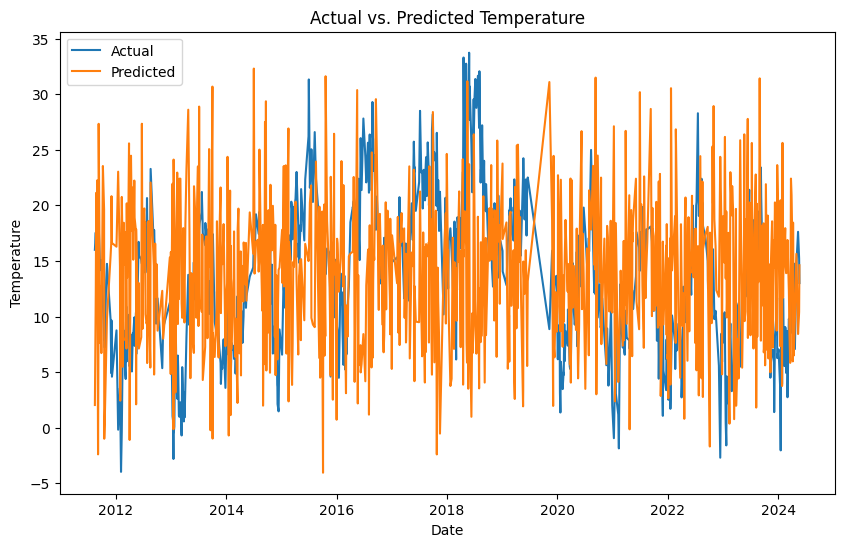

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Actual vs. Predicted Temperature')
plt.legend()
plt.show()